In [6]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import math
import openpyxl
from statistics import * 

In [49]:
#User enters data here
file = 'GCData-JGI_ACRs w Conc Data.xlsx' #file name
sheet = 'Corrected Concentration' #sheet with corrected concentration data
samples = ['A10','A12', 'B12', 'C10','C11','C12','D10','E11','H9','H10','H12','MaACR','Neg','Rec'] #name of samples ### Do these have to be in order?
numVials = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3] ### USER INPUT number of vials per sample in order of appearance 

# Check to see if lists samples and numVials are the same length
if len(samples) != len(numVials):
    raise Exception('Length of samples and numVials lists must be the same, hoe!')

chains = ['C8','C10','C12','C14','C16'] #chain lengths --> needs to be adjusted
title = 'JGI ACR Homolog' #graph title
ylabel = 'mg/L FaOH' #y axis label



In [54]:
#this function arranges data into an appropriate matrix. correctedConc should be clean with no empty spaces
def dataArrange(correctedConc, numTotSamples):
    numChains = int(len(correctedConc)/numTotSamples)
    correctedConc = np.array(correctedConc)
    rearranged = np.zeros((numTotSamples, numChains))
    iterator = 0;
    for sample in range(0,numTotSamples):
        for chain in range(0, numChains):
            rearranged[sample, chain] = correctedConc[iterator]
            iterator = iterator + 1 
    return rearranged.T, rearranged.T.shape

In [55]:
#Calculates average and standard deviation of data
def calcStats(data):
    stats = [mean(data), stdev(data)]
    return stats

In [56]:
#Returns average and standard deviation data in the form of matricies
def dataParse(rearranged, samples, numVials):
    #rearranged - the rearranged corrected concentration data table with each row corresponding to a chain length
        #and each column corresponding to a sample vial i.e.
        #
        #         H204A-1  H204A-2  H204A-3    WT-1    WT-2    WT-3
        #   C8 [[    #        #        #        #        #        #    ],
        #  C10  [    #        #        #        #        #        #    ],
        #  C12  [    #        #        #        #        #        #    ],
        #  C14  [    #        #        #        #        #        #    ],
        #  C16  [    #        #        #        #        #        #    ]]
        #
    #samples - list of each type of sample i.e. [H204A, WT]
    #numVials - number of vials per sample in order of appearance i.e. [3, 3]
    
    numChains = int(len(rearranged[0])) #number of chain lengths testing for
    avgMat = np.zeros((numChains, len(samples))) #matrix to store average data
    stdevMat = np.zeros((numChains, len(samples))) #matrix to store stdev data

    row_number = range(0,len(chains))
    column_number = range(0,len(samples))

    for r in row_number:
        #print(rearranged[0][r])
        for c in column_number:
            avgMat[r,c] = np.mean(rearranged[0][r][c*3:(c*3)+2]) # rearranged is an array which is set up such that each row contains the concentration for a given chain length for all samples
            stdevMat[r,c] = np.std(rearranged[0][r][c*3:(c*3)+2])
        
    return avgMat,stdevMat

In [57]:
#Creates stacked bar chart of chain length distributions
def createBarChart (file, sheet, samples, numVials, chains, title, ylabel):
    #get concentration data from excel sheet
    concData = getCorrectedConcentration(file,sheet)
    #arrange data into more managable rows and columns
    rearranged = dataArrange(concData, sum(numVials))
    
    #get mean and standard deviation data
    avgMat, stdevMat = dataParse(rearranged, samples, numVials)
    df_avg = pd.DataFrame(avgMat, columns=samples)
    df_std = pd.DataFrame(stdevMat, columns=samples)

    #plot data
    %matplotlib inline
    N = len(samples)
    ind = np.arange(N)
    width = 0.35
    firstMean = df_avg.loc[0,:]
    firstStd = df_std.loc[0,:]
    fistplot = plt.bar(ind, firstMean, width, yerr=firstStd, label=chains[0])
    sumMeans = [0]*len(samples)
    for chain in range(1,len(chains)):
        chainMean = df_avg.loc[chain,:]
        prevChainMean = df_avg.loc[chain-1,:]
        for i in range(len(sumMeans)):
            sumMeans[i] = sumMeans[i] + prevChainMean[i]
        chainStd = df_std.loc[chain,:]
        plt.bar(ind, chainMean, width, bottom=sumMeans, yerr=chainStd, label=chains[chain])
    plt.xticks(ind,samples)
    plt.legend()
    plt.suptitle(title)
    plt.ylabel(ylabel)
    plt.show

In [58]:
#returns clean list of corrected concentrations from an excel file
def getCorrectedConcentration (file, sheet):
    wb = openpyxl.load_workbook(file)
    df = pd.read_excel(file, sheet_name=sheet)
    #print(df)
    correctedConc = []
    for i in df.index:
        conc = df['Corrected Concentration'][i]
        if isinstance(conc, float) and not math.isnan(conc): #math.isnan returns True if conc is nan
            correctedConc.append(conc)
            
            #print(correctedConc)
    return correctedConc

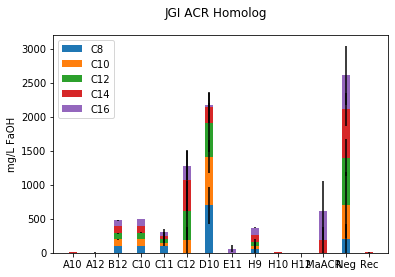

In [59]:
createBarChart(file, sheet, samples, numVials, chains, title, ylabel)

In [50]:
row_number = range(0,len(chains))

for r in row_number:
    print(len(rearranged[0][r]))

42
42
42
42
42


In [43]:
rearranged[0]

array([[  7.73168866e-01,   8.55740275e-01,   9.52122254e-01,
          7.42625925e-01,   6.36827717e-01,   8.87417535e+01,
          9.71768174e+01,   9.98610769e+01,   9.97717123e+01,
          9.94565185e+01,   1.00117507e+02,   9.98208572e+01,
          1.00480038e+02,   9.91194177e+01,   6.20373278e-01,
          1.54281014e-02,   2.37865653e+00,   5.82032451e+01,
          9.71541637e+02,   4.26724161e+02,   1.45579781e-02,
          7.79791907e-01,   2.36606280e+00,   9.80327327e+01,
          5.42900205e-01,   9.95909841e+01,   1.01551977e+02,
          8.79792126e-01,   9.86303847e-01,   5.69060023e-01,
          9.64497413e-01,   8.70968565e-01,   1.53449895e-02,
          1.55851387e-02,   1.51977538e-02,   8.91076131e+02,
          4.18772048e+02,   9.47823863e-02,   4.55834920e+02,
          8.41555949e-01,   5.11269154e-02,   5.45438577e-01],
       [  8.88394874e-01,   3.22073983e+00,   5.83734977e-01,
          1.01041626e+00,   1.00122433e+00,   9.82837776e+01,
       

In [35]:
concData = getCorrectedConcentration(file,sheet)

In [36]:
concData

[0.77316886569610555,
 0.8883948736744669,
 0.87979212587598188,
 1.0309106522691751,
 1.0487169594330668,
 0.85574027501160377,
 3.2207398258302558,
 0.98630384736066523,
 2.9478948663719087,
 0.75840416181940928,
 0.95212225389576677,
 0.58373497712826317,
 0.56906002347608242,
 0.84728971031229838,
 2.7729622581074471,
 0.74262592537950678,
 1.0104162553012754,
 0.96449741337816319,
 1.0201470111520039,
 0.51593615888257194,
 0.63682771713304598,
 1.0012243301451595,
 0.87096856515312937,
 1.0299758535611143,
 0.8242108962078728,
 88.741753542840144,
 98.283777591536449,
 98.660642133114649,
 96.111316299273057,
 95.734170916078085,
 97.176817384685037,
 96.804845453909209,
 86.118664824302826,
 99.294370570928805,
 98.846645937527299,
 99.861076877486312,
 98.958656955470204,
 97.750970356058787,
 98.448405877165413,
 80.046545160923458,
 99.771712251574215,
 99.055328453661048,
 99.264036080826926,
 100.16008142612041,
 98.775257117753696,
 99.456518460633845,
 100.03121931576521,

In [37]:
rearranged = dataArrange(concData, sum(numVials))

In [22]:
avgMat, stdevMat = dataParse(rearranged, samples, numVials)

IndexError: index 5 is out of bounds for axis 0 with size 5

In [51]:
numChains = int(len(rearranged[0])) #number of chain lengths testing for
avgMat = np.zeros((numChains, len(samples))) #matrix to store average data
stdevMat = np.zeros((numChains, len(samples))) #matrix to store stdev data

row_number = range(0,len(chains))
column_number = range(0,len(samples))


In [52]:
for r in row_number:
    print(rearranged[0][r])
    for c in column_number:
        avgMat[r,c] = np.mean(rearranged[0][r][c*3:(c*3)+2]) # rearranged is an array which is set up such that each row contains the concentration for a given chain length for all samples
        stdevMat[r,c] = np.std(rearranged[0][r][c*3:(c*3)+2])
        
#return avgMat,stdevMat

[  7.73168866e-01   8.55740275e-01   9.52122254e-01   7.42625925e-01
   6.36827717e-01   8.87417535e+01   9.71768174e+01   9.98610769e+01
   9.97717123e+01   9.94565185e+01   1.00117507e+02   9.98208572e+01
   1.00480038e+02   9.91194177e+01   6.20373278e-01   1.54281014e-02
   2.37865653e+00   5.82032451e+01   9.71541637e+02   4.26724161e+02
   1.45579781e-02   7.79791907e-01   2.36606280e+00   9.80327327e+01
   5.42900205e-01   9.95909841e+01   1.01551977e+02   8.79792126e-01
   9.86303847e-01   5.69060023e-01   9.64497413e-01   8.70968565e-01
   1.53449895e-02   1.55851387e-02   1.51977538e-02   8.91076131e+02
   4.18772048e+02   9.47823863e-02   4.55834920e+02   8.41555949e-01
   5.11269154e-02   5.45438577e-01]
[  8.88394874e-01   3.22073983e+00   5.83734977e-01   1.01041626e+00
   1.00122433e+00   9.82837776e+01   9.68048455e+01   9.89586570e+01
   9.90553285e+01   1.00031219e+02   1.00004106e+02   9.90005978e+01
   9.96203398e+01   1.75500785e-02   1.55296115e-02   1.47118299e-0

In [53]:
avgMat

array([[  8.14454570e-01,   6.89726821e-01,   9.85189471e+01,
          9.97870128e+01,   9.97997279e+01,   1.19704232e+00,
          6.99132899e+02,   1.57292735e+00,   5.00669422e+01,
          9.33047987e-01,   9.17732989e-01,   1.53914462e-02,
          2.09433415e+02,   4.46341432e-01],
       [  2.05456735e+00,   1.00582029e+00,   9.78817512e+01,
          1.00017663e+02,   4.98189449e+01,   1.87677735e+02,
          7.10354351e+02,   1.28246760e+00,   5.35583255e+01,
          1.98940276e+00,   1.02506143e+00,   3.53401713e-01,
          4.90333788e+02,   1.51434800e+00],
       [  9.33047987e-01,   9.17732989e-01,   9.19348176e+01,
          9.34337066e+01,   4.98523927e+01,   4.31039199e+02,
          4.99905116e+02,   3.23876214e-01,   5.12875633e+01,
          9.03560561e-01,   6.70073528e-01,   1.19704232e+00,
          6.99132899e+02,   1.57292735e+00],
       [  1.98940276e+00,   1.02506143e+00,   9.88713882e+01,
          9.99317528e+01,   4.97609882e+01,   4.45545664e+0